<a href="https://colab.research.google.com/github/carlos-exe/Teoria/blob/main/TALLER_1_SyS_funcional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teoría de señales - Taller 1


_Transformada de Fourier, Sistemas lineales y Modulación_

----

Hallar la ecuación diferencial que describe cada uno de los siguientes circuitos:

  1. Hallar la función de transferencia $h(t)$.
  1. Asumir que a la entrada $x(t)$ hay un **pulso cuadrado**, hallar la salida en tiempo ($y(t)$) y frecuencia ($Y(\omega)$).
  1. Modular la salida del sistema en cada una de las modulaciones vistas en clase (representar la señal modulada en el tiempo y hallar su espectro)


# Función de transferencia

**1. Hallar la función de transferencia**

Para hallar la función de transferencia se hace una conversión de los elementos del circuito al dominio de la frecuencia y acto seguido se hace el equivalente de las impedancias para relacionar la tensión de entrada con la de salida.


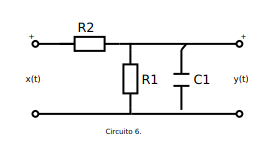

$$
C_1 ----> \frac{1}{S*C_1}  [Ω]
$$ 
$$
R1, R2 -----> R1, R2  [Ω]
$$

se soluciona el paralelo entre el capacitor y R_1


$$ R_1 || \frac{1}{SC_1}  =  \frac{R_1*\frac{1}{SC_1}}{R_1+\frac{1}{SC_1}} = \frac{R_1}{R_1*S*C_1+1}  $$

Y se obtiene que:

$$  \frac{R_1}{S*R_1*C_1+1}*X(S) = (\frac{R_1}{S*R_1*C_1+1}+R_2)*Y(S)  $$


Para hallar su función de transferencia así:

$$  \frac{Y(S)}{X(S)} = \frac{\frac{R_1}{R_1SC_1+1}}{\frac{R_1}{S*R_1*C_1+1}+R_2}  $$

$$G(s)=\frac{1}{R_2 SC+\frac{R_2}{R_1}+1} =\frac{\frac{1}{R_2 C}}{S+\frac{R_2}{R_1 R_2 C}+\frac{1}{R_2}} = \frac{1}{R_2 C} \frac{1}{S+\frac{R_1 + R_2}{C R_1 R_2}}$$


In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import lti
from scipy.fftpack import fft, fftfreq, fftshift



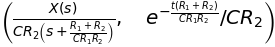

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R1, R2, C = sym.symbols('t R1 R2 C', positive=True)
X = sym.Function('X')(s)

Y = (1/(R2*C))/(s + ((R2+R1)/(R1*R2*C))) * X

y = sym.inverse_laplace_transform(Y.subs(X, 1), s, t)
Y,y

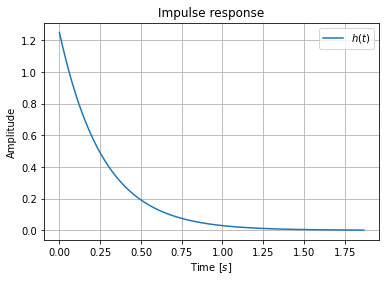

In [ ]:
R1 = 1
R2 = 2
C = 0.4
A = 1/(R2*C)
num = [A] 
den = [1,((R2+R1)/(R1*R2*C)) ] 

G = lti(num, den)   
tv, h = G.impulse(N=5000)  #se genera la respuesta impulso del sistema 

plt.plot(tv, h, label='$h(t)$') #se gráfica la respuesta impulso

plt.grid(True)
plt.legend()
plt.title("Impulse response")
plt.xlabel("Time [$s$]")
plt.ylabel("Amplitude")
plt.show()

# 2. Si Input signal es $x(t)= rect_{tau} (t)$    

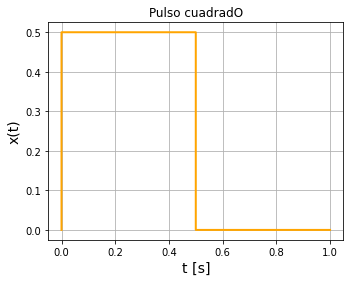

In [ ]:
tau= 2
Fs= 500
Nm=tau*Fs
A = 1/tau

t_1 = 1
t1 = np.linspace(0,0,Nm)
t2 = np.linspace(0,A,Nm)
t3 = np.linspace(A,2*A,Nm)

t = np.append(t1,(t2,t3))

x1 = 0*t1
x2 = A*np.ones(len(t2))
x3 = 0*t3

xt = np.append(x1,(x2,x3))

plt.figure(figsize=(18, 4))
plt.subplot(131)
plt.plot(t,xt,'orange',linewidth=2)
plt.title(r'Pulso cuadradO')
plt.xlabel("t [s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.grid()



- Se determina X(w) por fft a aprtir de $x(t)$

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


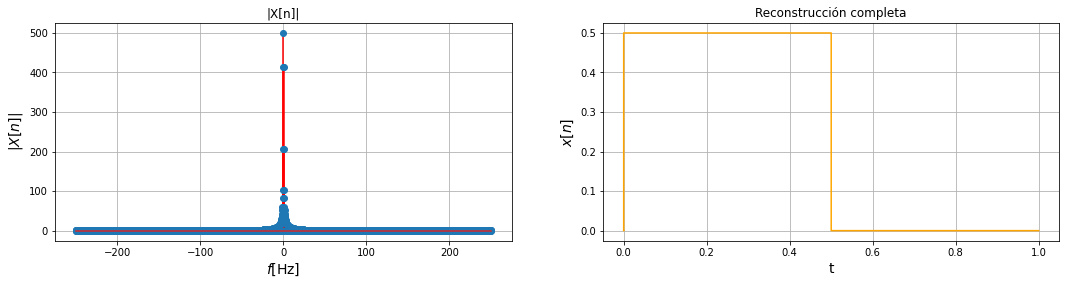

In [ ]:
vf = np.fft.fftfreq(len(xt),1/Fs) 
Xw = np.fft.fft(xt) 
xe = np.fft.ifft(Xw)

plt.figure(figsize=(18, 4))
plt.subplot(121)
plt.stem(vf,abs(Xw),'r',use_line_collection= True)
plt.title(r'|X[n]|')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.subplot(122)
plt.plot(t,xe,'orange',label = '${x}[k]$')
plt.title(r'Reconstrucción completa')
plt.xlabel(r't',fontsize = 14)
plt.ylabel(r'$x[n]$',fontsize = 14)
plt.grid()

- Se determina $X(w)$ escribiendo la transformada de Lpalcade del pulso cuadrado con ancho 0.5 y graficandola

In [ ]:
X_in = (A/s)*(1-sym.exp(-A*s))
X_in

- Se halla la respuesta del sistema ante el pulso cuadrado

/usr/local/lib/python3.6/dist-packages/scipy/signal/ltisys.py:1965: RuntimeWarning: divide by zero encountered in true_divide
  if not np.allclose((T[1:] - T[:-1]) / dt, 1.0):
/usr/local/lib/python3.6/dist-packages/scipy/signal/ltisys.py:1965: RuntimeWarning: invalid value encountered in true_divide
  if not np.allclose((T[1:] - T[:-1]) / dt, 1.0):
/usr/local/lib/python3.6/dist-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


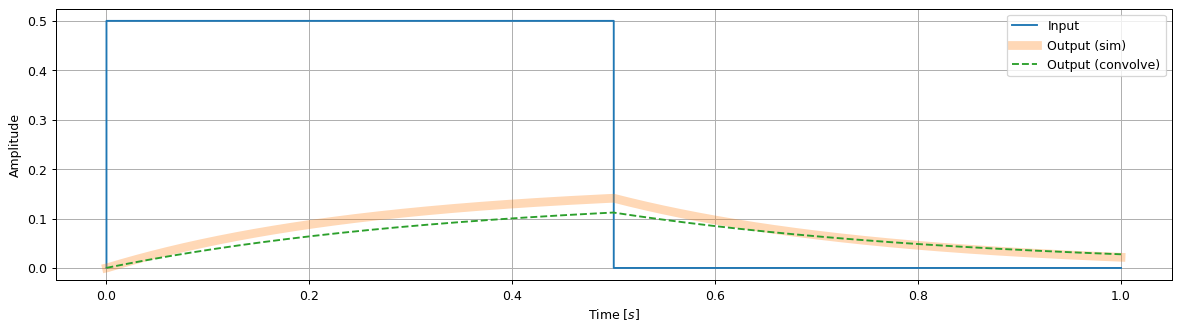

In [ ]:
#Comparar la salida de convolve con la output, debe ser la misma.
plt.figure(figsize=(16, 4), dpi=90)

_,output,_ = G.output(xt, t)
output_c = np.convolve(xt, h)[:t.shape[0]]*((t[-1]/t.shape[0]))

plt.plot(t,xt, '-', C='C0', label='Input')
plt.plot(t, output, '-', C='C1', linewidth=7, alpha=0.3, label='Output (sim)')
plt.plot(t, output_c, '--', C='C2', label='Output (convolve)')

plt.grid(True)
plt.legend()
# plt.xlim(0, 20)
plt.xlabel('Time [$s$]')
plt.ylabel('Amplitude')
plt.show()



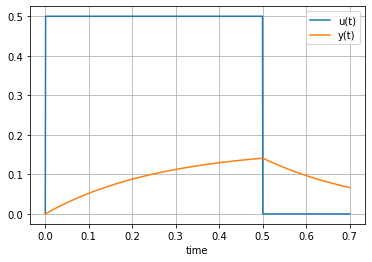

In [ ]:
import sympy as sym
from sympy.abc import s,t,x,y,z
import numpy as np 
from sympy.integrals import inverse_laplace_transform,laplace_transform
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual

U2 = 0.5/s*sym.exp(0.5*s*0)
U3 = -0.5/s*sym.exp(-0.5*s)

#X_in = (0.5/s)*(1-sym.exp(-0.5*s))
#x_in = sym.inverse_laplace_transform(X_in, s, t)
#sym.plot(x_in, (t, 0, 1), xlabel='$t$', ylabel='$x_{in}(t)$')

R1 = 1
R2 = 2
C = 0.4
A = 1/(R2*C)
G = (1/(R2*C))/(s + ((R2+R1)/(R1*R2*C))) 

Y2 = G * U2
Y3 = G * U3


u2 = inverse_laplace_transform(U2,s,t)
u3 = inverse_laplace_transform(U3,s,t)
y2 = inverse_laplace_transform(Y2,s,t)
y3 = inverse_laplace_transform(Y3,s,t)

tm = np.linspace(-0.000000001,0.7,1000)
us = np.zeros(len(tm))
ys = np.zeros(len(tm))

for u in [u2,u3]:
  for i in range(len(tm)):
      us[i] += u.subs(t,tm[i])
      
for y in [y2,y3]:
  for i in range(len(tm)):
      ys[i] += y.subs(t,tm[i])

plt.figure()
plt.plot(tm,us,label='u(t)')
plt.plot(tm,ys,label='y(t)')
plt.legend()
plt.grid (True)
plt.xlabel('time')
plt.show()